<a href="https://colab.research.google.com/github/suneelshrestha/ML_from_scratch/blob/main/kmeanscluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

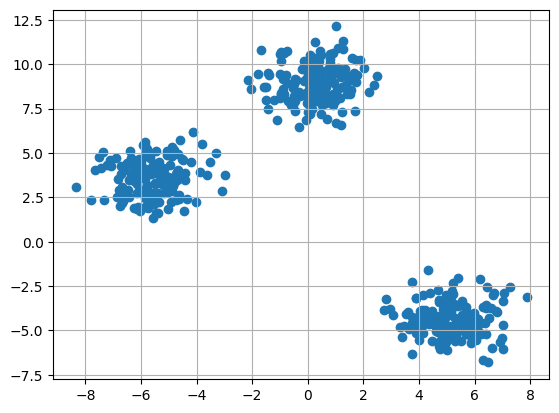

In [2]:
x,y = make_blobs(n_samples = 500, n_features= 2, centers=3,random_state=23)
fig = plt.figure(0)
plt.grid(True)
plt.scatter(x[:,0],x[:,1])
plt.show()

In [3]:
k = 3
clusters = {}
np.random.seed(23)
for idx in range(k):
  center = 2*(2*np.random.random((x.shape[1],))-1)
  points = []
  cluster = {
      'center':center,
      'points':[]
  }
  clusters[idx] = cluster
clusters



{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}

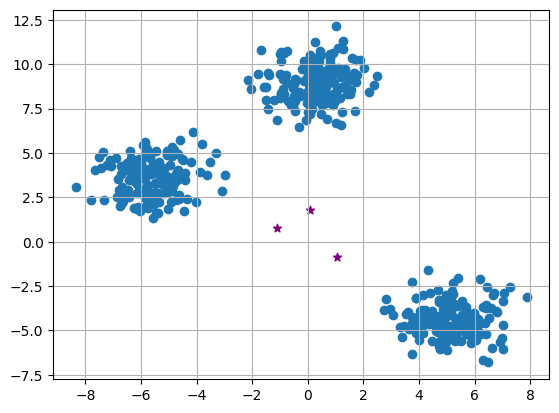

In [4]:
plt.scatter(x[:,0],x[:,1])
plt.grid(True)
for i in clusters:
  center = clusters[i]['center']
  plt.scatter(center[0],center[1],marker='*',c = 'purple')
plt.show()


In [5]:
def distance(p1,p2):
  return np.sqrt(np.sum((p1-p2)**2))

In [6]:
def assign_clusters(x,clusters):
  for idx in range(x.shape[0]):
    dist = []
    curr_x = x[idx]
    for i in range(k):
      dis = distance(curr_x,clusters[i]['center'])
      dist.append(dis)
    curr_cluster = np.argmin(dist)
    clusters[curr_cluster]['points'].append(curr_x)
  return clusters

def update_clusters(x,clusters):
  for i in range(k):
    points= np.array(clusters[i]['points'])
    if points.shape[0]>0:
      new_center = points.mean(axis = 0)
      clusters[i]['center'] = new_center
      clusters[i]['points'] = []
  return clusters

In [7]:
def pred_cluster(x,clusters):
  pred = []
  for i in range(x.shape[0]):
    dist = []
    for j in range(k):
      dist.append(distance(x[i],clusters[j]['center']))
    pred.append(np.argmin(dist))
  return pred

In [8]:
clusters = assign_clusters(x,clusters)
clusters = update_clusters(x,clusters)
pred = pred_cluster(x,clusters)

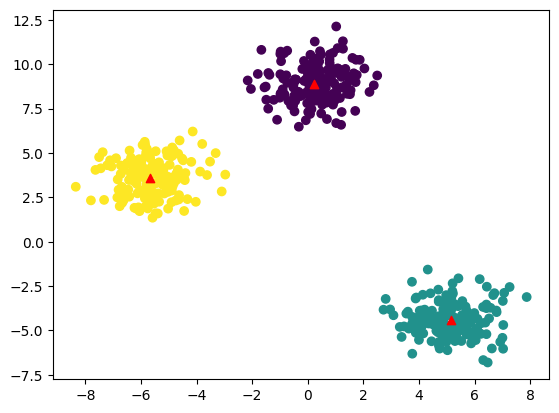

In [9]:
plt.scatter(x[:,0],x[:,1],c = pred)
for i in clusters:
  center = clusters[i]['center']
  plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()
